# A Simple Neural Network in Tensorflow

In [2]:
# import libraries
import numpy as np;
from matplotlib import pyplot as plt 
from sklearn import datasets

import tensorflow as tf;
import tensorflow.keras as keras

In [ ]:
# you might need to install tensorflow and rerun above cell, if you get an error
# !pip install tensorflow

X:  (1797, 8, 8) float64
y:  (1797,) int64


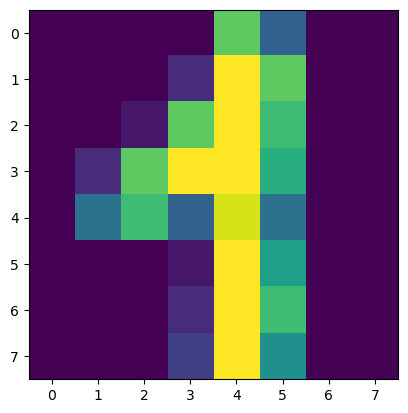

In [3]:
# digits
digits = datasets.load_digits()
X = digits.images
y = digits.target
# analyze a bit
print("X: ", X.shape, X.dtype)
print("y: ", y.shape, y.dtype)

plt.imshow(X[42,:,:])

# Step 1: Encode Classification in One-Hot
In deep learning, one usually represents a classification result like a score vector over the choices. That is, a vector in which each position is the probability for the class at this position. In our case, this means, we convert each target value like $y_k == 4$ into a target vector $(0,0,0,1,0,0,...)$. The classification will choose the largest entry in the predicted vector as the predicted class

In [4]:
y_onehot=np.zeros(10*y.shape[0]).reshape(-1,10)
for i,yval in enumerate(y):
    y_onehot[i,yval] = 1
print(y_onehot[:5,:], y[:5])
y = y_onehot

X = X.reshape((X.shape[0], -1))
print(X.shape)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [0 1 2 3 4]
(1797, 64)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

# Step 2: Implement Neural Network Using Keras

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=(64,)),
        keras.layers.Dense(32, activation="sigmoid", name="layer1"),
        keras.layers.Dense(10, activation="sigmoid", name="layer2"),
    ]
)


# Train



In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=50)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.1876 - loss: 2.4284 
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.4808 - loss: 1.8270
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.6719 - loss: 1.5210
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.7922 - loss: 1.3138
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.8514 - loss: 1.1324
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8671 - loss: 0.9724
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8939 - loss: 0.8642
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9265 - loss: 0.7542
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.9117 - loss: 0.7046
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9412 - loss: 0.6140
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9450 - loss: 0.5461
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/ste

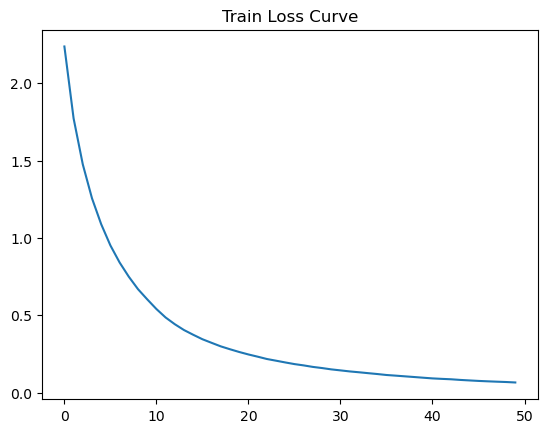

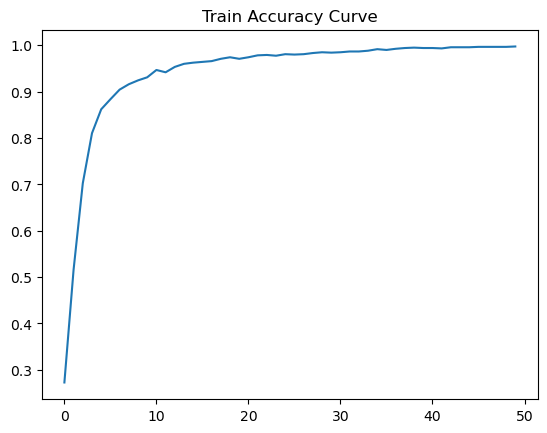

In [8]:
plt.plot(history.epoch, history.history["loss"])
plt.title("Train Loss Curve")
plt.show()

plt.plot(history.epoch, history.history["accuracy"])
plt.title("Train Accuracy Curve")
plt.show()


Choosing X[700]


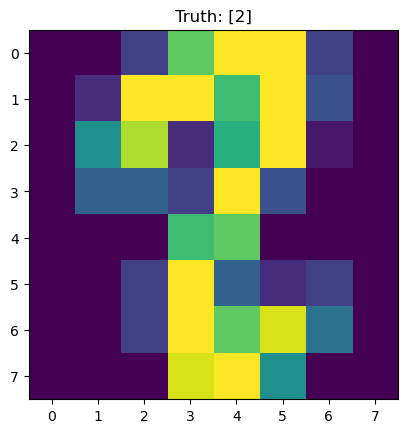

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(1, 10)


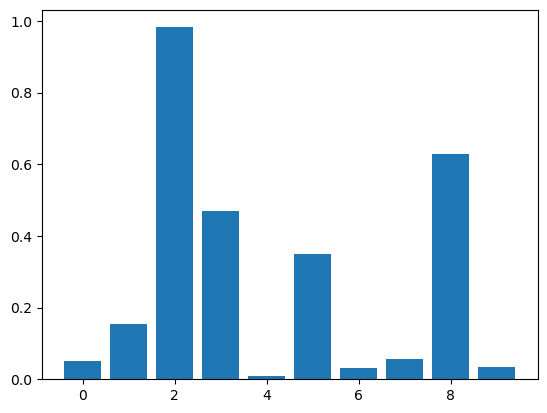

array([2])

In [9]:
chosen = np.random.choice(range(X.shape[0]))
print("Choosing X[%d]"% chosen)
plt.imshow(X[chosen,:].reshape(8,8))
plt.title("Truth: %s" % str(np.where(y[chosen,:]==1)[0]))
plt.show()
y_pred = model.predict(X[chosen,:].reshape(1,-1))
print(y_pred.shape)
plt.bar(range(10),y_pred[0,:])
plt.show()
np.argmax(y_pred, axis=1)

# Disclaimer
This model just shows how everything fits together. It misses a probable training, parameter search and evaluation. In fact, for simplicity, we did not even split a test set of the dataset

# Evaluating the Model

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
Test Set Accuracy: 0.9680
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  1  0  0  0  1  0]
 [ 0  1 52  1  0  1  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  2]
 [ 0  1  0  0 63  1  1  0  0  0]
 [ 0  1  0  0  0 68  0  0  1  0]
 [ 0  0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  0]
 [ 0  1  0  0  0  1  0  0 50  1]
 [ 0  0  0  1  0  2  0  1  0 65]]


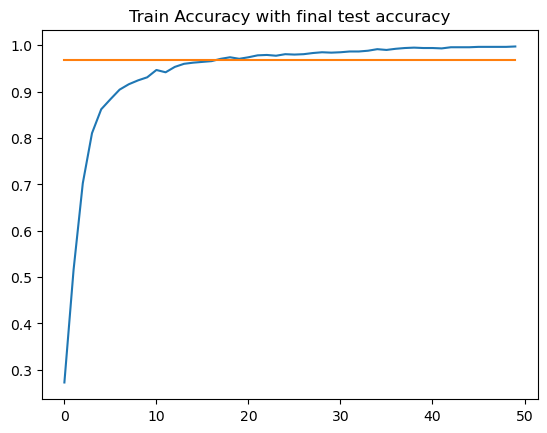

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_am = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_pred, y_test_am)
print("Test Set Accuracy: %.4f" % (accuracy_score(y_pred, y_test_am)) )

print(cm)


# Train accuracy vs. final test set accuracy
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, np.repeat(accuracy_score(y_pred, y_test_am), len(history.epoch)))
plt.title("Train Accuracy with final test accuracy")
plt.show()


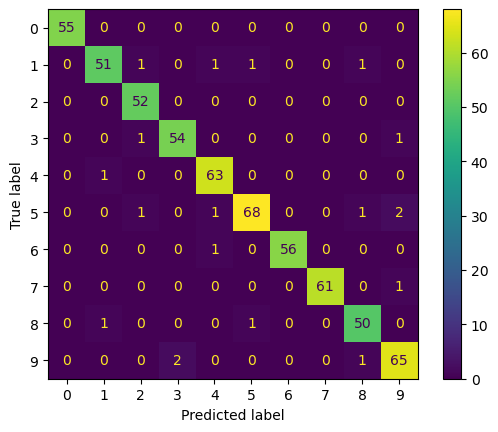

In [11]:
# another function to show the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_am, y_pred)

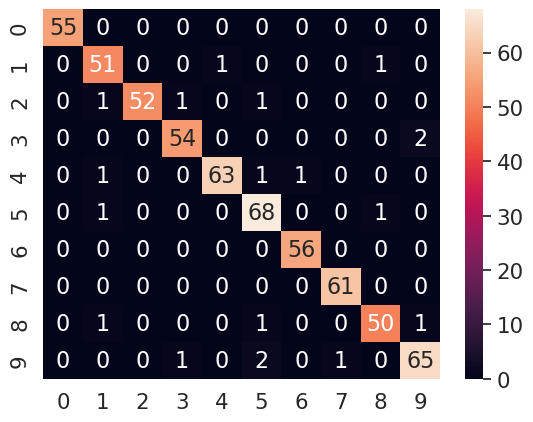

In [12]:
# another function to show the confusion matrix
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

